In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [3]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')

In [65]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [66]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [75]:
df=pd.concat([train,test])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [40]:
def missing_values(data_name):
    missing=data_name.isnull().sum().sort_values(ascending=False)
    total=(data_name.isnull().sum()/data_name.isnull().count()).sort_values(ascending=False)
    d=pd.concat([missing,total],axis=1,keys=['values','percentage'])
    return(d)

In [41]:
missing_values(df)

,values,percentage
Price,2671,0.200015
Total_Stops,1,0.000075
Route,1,0.000075
Source,0,0.000000
Duration,0,0.000000
Destination,0,0.000000
Dep_Time,0,0.000000
Date_of_Journey,0,0.000000
Arrival_Time,0,0.000000
Airline,0,0.000000


In [12]:
df.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Date_of_Journey     object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
dtype: object

In [13]:
df.head(2)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops


In [14]:
df.nunique()

Additional_Info      10
Airline              12
Arrival_Time       1451
Date_of_Journey      44
Dep_Time            223
Destination           6
Duration            374
Price              1870
Route               132
Source                5
Total_Stops           5
dtype: int64

In [15]:
a=pd.DataFrame(df['Date_of_Journey'].str[-4:])
a.head()

,Date_of_Journey
0,2019
1,2019
2,2019
3,2019
4,2019


In [16]:
a['Date_of_Journey'].unique()

array(['2019'], dtype=object)

In [17]:
b=pd.DataFrame(df['Date_of_Journey'].str[-7:])
b.head()

,Date_of_Journey
0,03/2019
1,05/2019
2,06/2019
3,05/2019
4,03/2019


In [18]:
b['Date_of_Journey'].unique()

array(['03/2019', '05/2019', '06/2019', '04/2019'], dtype=object)

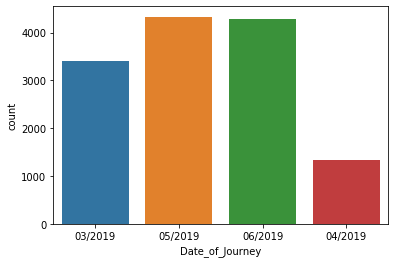

In [19]:
sns.countplot(b['Date_of_Journey'])
plt.show()



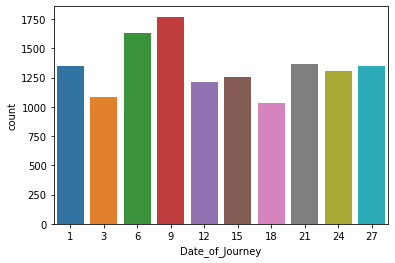

In [494]:
sns.countplot(c['Date_of_Journey'])
plt.show()

In [21]:
c=pd.DataFrame(df['Date_of_Journey'].str[:-8])
c.head()

,Date_of_Journey
0,24
1,1
2,9
3,12
4,01


In [22]:
c['Date_of_Journey'].unique()

array(['24', '1', '9', '12', '01', '27', '18', '3', '15', '6', '21', '06',
       '09', '03'], dtype=object)

##### The given dataset is of year 2019 and from month march to June\

In [38]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [39]:
df.groupby(by=['Airline'])['Price'].mean().reset_index()

,Airline,Price
0,Air Asia,5590.260188
1,Air India,9611.210616
2,GoAir,5861.056701
3,IndiGo,5673.682903
4,Jet Airways,11643.923357
5,Jet Airways Business,58358.666667
6,Multiple carriers,10902.678094
7,Multiple carriers Premium economy,11418.846154
8,SpiceJet,4338.284841
9,Trujet,4140.000000


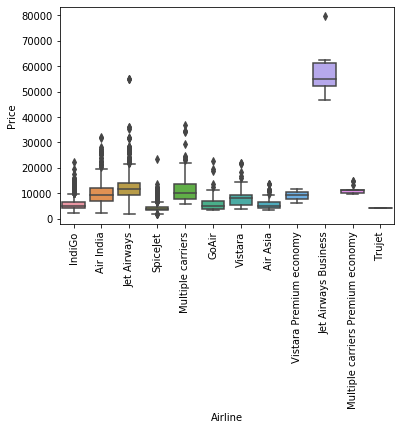

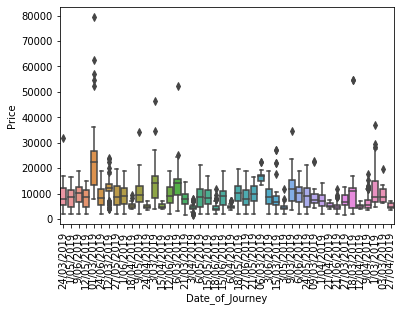

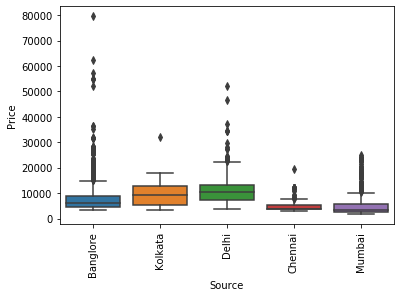

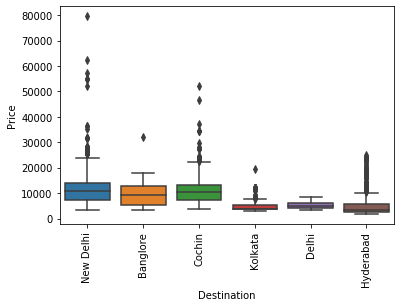

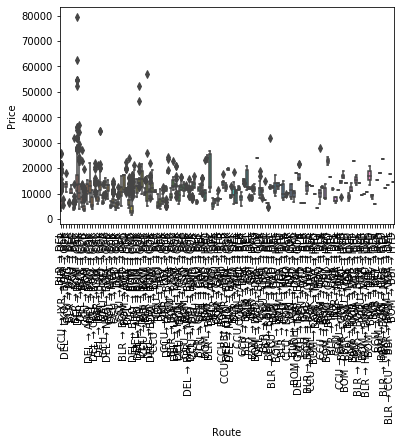

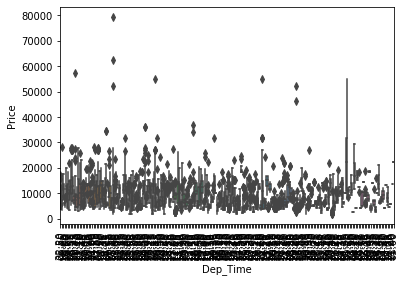

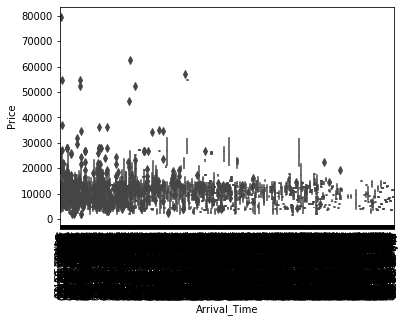

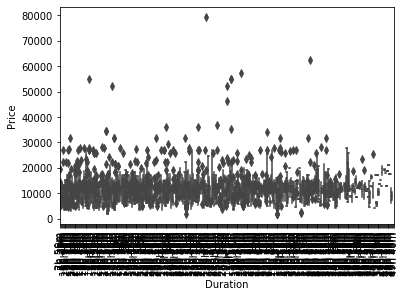

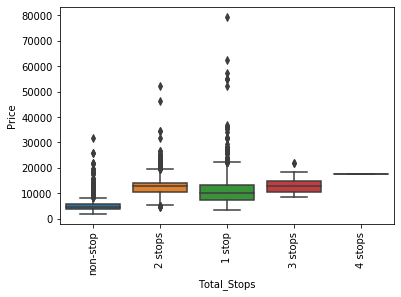

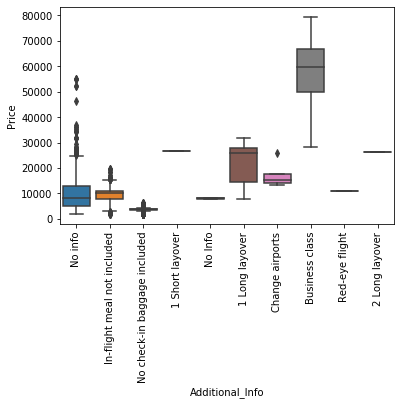

In [56]:
c=train.drop(['Price'],axis=1)
for i in c.columns:
    sns.boxplot(x=c[i],y=train.Price)
    plt.xticks(rotation=90)
    plt.show()

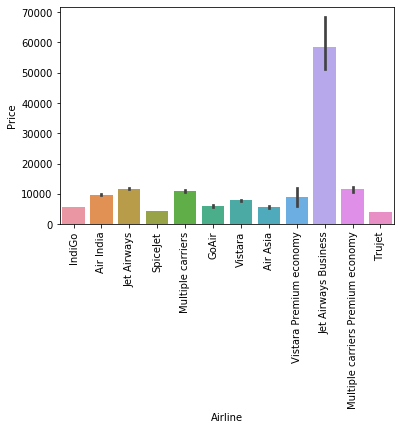

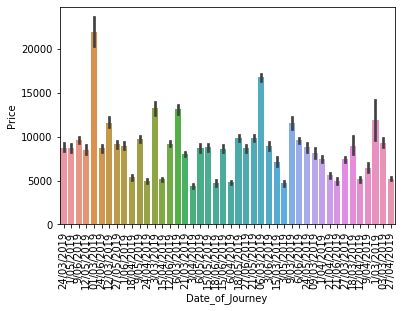

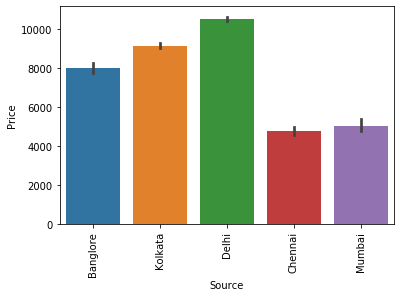

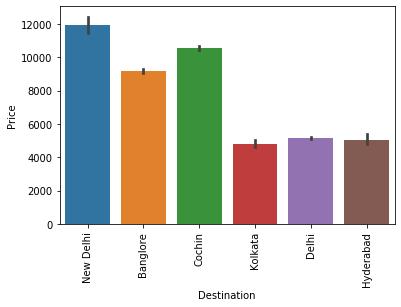

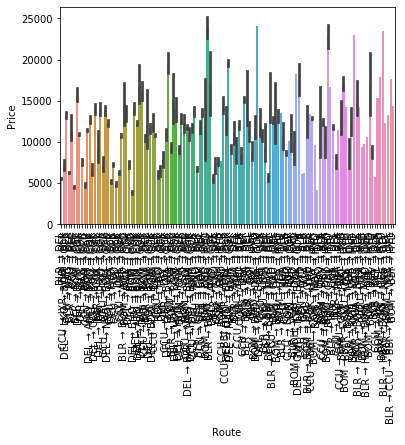

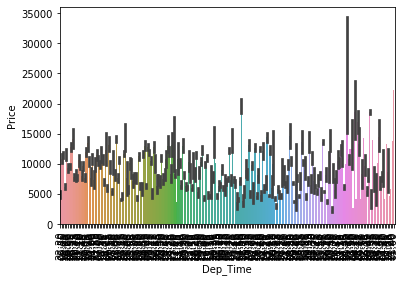

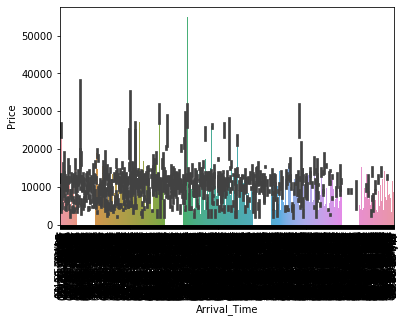

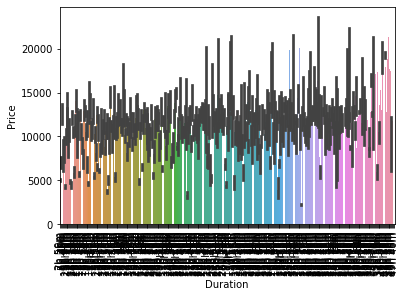

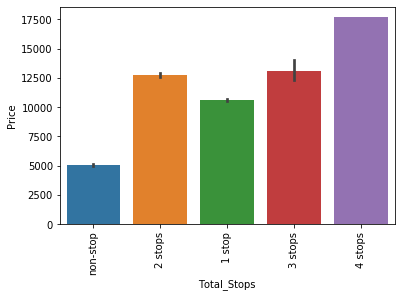

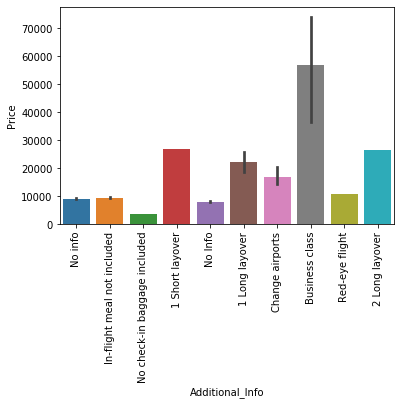

In [57]:
for i in c.columns:
    sns.barplot(x=c[i],y=train.Price)
    plt.xticks(rotation=90)
    plt.show()

In [347]:
df=pd.concat([train,test])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [348]:
df.head(2)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops


In [349]:

#removing monnths from arrival time
df['Arrival_Time']=df['Arrival_Time'].str[:5]
df.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


In [353]:
#df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
#df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

#df.Dep_Time=[time.time() for time in df.Dep_Time]
#df.Arrival_Time=[time.time() for time in df.Arrival_Time]
#df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'],format= '%H:%M:%S' ).dt.time

In [354]:
df['Arrival_hour']=df['Arrival_Time'].str[:2].astype('int')
df['Arrival_min']=df['Arrival_Time'].str[3:].astype('int')
df['Dep_hour']=df['Dep_Time'].str[:2].astype('int')
df['Dep_min']=df['Dep_Time'].str[3:].astype('int')

In [355]:
df.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

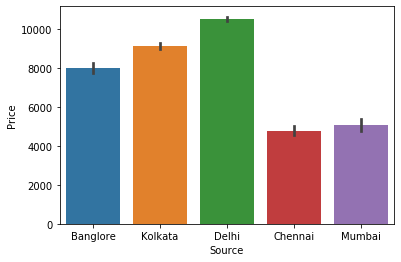

In [323]:
sns.barplot(x='Source',y='Price',data=df)
plt.show()

In [324]:
#changing duration whole to minutes.

In [361]:
import re 
df["duration_h"] = df['Duration'].str.split(' ').str[0]
df[['Duration','duration_h']].head(3)

,Duration,duration_h
0,2h 50m,2h
1,7h 25m,7h
2,19h,19h


In [363]:
df["duration_m"] = df['Duration'].str.split(' ').str[1]
df[['Duration','duration_h','duration_m']].head(10)

,Duration,duration_h,duration_m
0,2h 50m,2h,50m
1,7h 25m,7h,25m
2,19h,19h,NaN
3,5h 25m,5h,25m
4,4h 45m,4h,45m
5,2h 25m,2h,25m
6,15h 30m,15h,30m
7,21h 5m,21h,5m
8,25h 30m,25h,30m
9,7h 50m,7h,50m


In [330]:

def missing_values(data_name):
    missing=data_name.isnull().sum().sort_values(ascending=False)
    total=(data_name.isnull().sum()/data_name.isnull().count()).sort_values(ascending=False)
    d=pd.concat([missing,total],axis=1,keys=['values','percentage'])
    return(d)
missing_values(df)

,values,percentage
Price,2671,0.200015
duration_m,1286,0.096301
Total_Stops,1,0.000075
Route,1,0.000075
duration_h,0,0.000000
Dep_min,0,0.000000
Dep_hour,0,0.000000
Arrival_min,0,0.000000
Arrival_hour,0,0.000000
Source,0,0.000000


In [364]:
# replacing nan with zero in minutes
df['duration_m']=df['duration_m'].fillna('0')


In [365]:
df.groupby(by=['Total_Stops','Destination','Source'])['Airline'].value_counts()

Total_Stops  Destination  Source    Airline                          
1 stop       Banglore     Kolkata   Jet Airways                          1556
                                    Vistara                               227
                                    Air India                             179
                                    IndiGo                                167
                                    SpiceJet                               64
                                    Air Asia                               60
                                    GoAir                                  27
             Cochin       Delhi     Multiple carriers                    1483
                                    Jet Airways                          1065
                                    IndiGo                                800
                                    Air India                             353
                                    SpiceJet                            

In [366]:
df[df['Total_Stops'].isnull()]

,Additional_Info,Airline,Date_of_Journey,Destination,Duration,Price,Route,Source,Total_Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_h,duration_m
9039,No info,Air India,6/05/2019,Cochin,23h 40m,7480.0,NaN,Delhi,NaN,9,25,9,45,23h,40m


In [368]:
# replacing missing values
df['Total_Stops']=df.groupby(by=['Airline'])['Total_Stops'].transform(lambda x:x.fillna(x.mode()[0]))
df['Route']=df.groupby(by=['Total_Stops','Airline'])['Route'].transform(lambda x: x.fillna(x.mode()))


In [369]:
# checking if null values still present.
df.isnull().sum()

Additional_Info       0
Airline               0
Date_of_Journey       0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
duration_h            0
duration_m            0
dtype: int64

In [370]:
df.drop(['Duration'],axis=1,inplace=True)

In [372]:
#replacing h and m with sapce
df['duration_h']=df['duration_h'].str.replace('h','')
df['duration_m']=df['duration_m'].str.replace('m','')

In [375]:
df[df['duration_h']=='5m']

,Additional_Info,Airline,Date_of_Journey,Destination,Price,Route,Source,Total_Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_h,duration_m
6474,No info,Air India,6/03/2019,Hyderabad,17327.0,BOM → GOI → PNQ → HYD,Mumbai,2 stops,16,55,16,50,5m,0
2660,No info,Air India,12/03/2019,Hyderabad,NaN,BOM → GOI → PNQ → HYD,Mumbai,2 stops,16,55,16,50,5m,0


In [376]:
df.loc[6474,'duration_h']='0'
df.loc[6474,'duration_m']='5'
df.loc[2660,'duration_h']='0'
df.loc[2660,'duration_m']='5'

In [377]:

df['duration_h']=df['duration_h'].astype(int)
df['duration_m']=df['duration_m'].astype(int)


df['Total_Stops']=df['Total_Stops'].map({'non-stop':'0','1 stop':'1','2 stops':'2','3 stops':'3','4 stops':'4'}).astype(int)


In [384]:
# extracting month and day from date of journey
df['Date_of_Journey_month']=df['Date_of_Journey'].str[-7:-5]
df['Date_of_Journey_day']=df['Date_of_Journey'].str[:-8]


In [386]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [387]:
df['Duration']=df['duration_m']+(df['duration_h']*60)

In [388]:
df.drop(['duration_h','duration_m'],axis=1,inplace=True)

In [389]:
df.dtypes

Additional_Info           object
Airline                   object
Destination               object
Price                    float64
Route                     object
Source                    object
Total_Stops                int32
Arrival_hour               int32
Arrival_min                int32
Dep_hour                   int32
Dep_min                    int32
Date_of_Journey_month     object
Date_of_Journey_day       object
Duration                   int32
dtype: object

In [392]:
df['Date_of_Journey_month']=df['Date_of_Journey_month'].astype(int)
df['Date_of_Journey_day']=df['Date_of_Journey_day'].astype(int)

In [393]:
df.head()

,Additional_Info,Airline,Destination,Price,Route,Source,Total_Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Date_of_Journey_month,Date_of_Journey_day,Duration
0,No info,IndiGo,New Delhi,3897.0,BLR → DEL,Banglore,0,1,10,22,20,3,24,170
1,No info,Air India,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,2,13,15,5,50,5,1,445
2,No info,Jet Airways,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,2,4,25,9,25,6,9,1140
3,No info,IndiGo,Banglore,6218.0,CCU → NAG → BLR,Kolkata,1,23,30,18,5,5,12,325
4,No info,IndiGo,New Delhi,13302.0,BLR → NAG → DEL,Banglore,1,21,35,16,50,3,1,285


In [495]:
df.head()

,Additional_Info,Airline,Destination,Price,Route,Source,Total_Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Date_of_Journey_month,Date_of_Journey_day,Duration
0,No info,IndiGo,New Delhi,3897.0,BLR → DEL,Banglore,0,1,10,22,20,3,24,170
1,No info,Air India,Banglore,7662.0,CCU → IXR → BBI → BLR,Kolkata,2,13,15,5,50,5,1,445
2,No info,Jet Airways,Cochin,13882.0,DEL → LKO → BOM → COK,Delhi,2,4,25,9,25,6,9,1140
3,No info,IndiGo,Banglore,6218.0,CCU → NAG → BLR,Kolkata,1,23,30,18,5,5,12,325
4,No info,IndiGo,New Delhi,13302.0,BLR → NAG → DEL,Banglore,1,21,35,16,50,3,1,285


In [498]:
df.to_csv('cleaned_date.csv')

In [403]:
#regression problem
df_l=df.dropna()

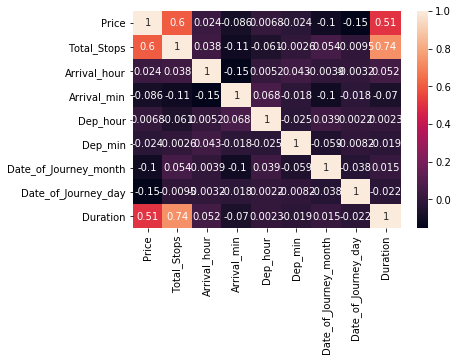

In [404]:
sns.heatmap(df_l.corr(),annot=True)